### Prof. Alfio Ferrara
# Rappresentazione vettoriale del testo
### Master in Digital Humanities

I calcolatori elettronici necessitano di convertire il linguaggio naturale in rappresentazioni numeriche o simboliche che possano essere processate algoritmicamente.

Un modo per trasformare il testo in una sua rappresentazione numerica consiste nell'associare un'entità matematica (per esempio un numero) alle componenti costitutive del testo. Chiamiamo queste componenti unitarie **token** e il processo di scomposizione del testo in token *tokenizzazione*.

La tokenizzazione è il processo fondamentale di suddivisione del testo in unità più piccole e gestibili chiamate **token**. Un token può essere una parola, una sottoparola, un carattere, o anche una frase, a seconda del metodo utilizzato e dell'applicazione specifica.

## Tokenizzazione e spazio vettoriale

Prendiamo ad esempio un corpus di pseudo-testi che contengono la condizione metereologica osservata giorno dopo giorno in periodi temporali di diversa durata

In [2]:
corpus = [
    "sole pioggia sole",                          # Testo 1 (3 giorni)
    "sole sole sole pioggia pioggia",             # Testo 2 (5 giorni)
    "pioggia pioggia pioggia sole",               # Testo 3 (4 giorni)
    "sole sole sole sole pioggia pioggia",        # Testo 4 (6 giorni)
    "pioggia pioggia",                            # Testo 5 (2 giorni)
    "sole sole sole sole sole pioggia pioggia",   # Testo 6 (7 giorni)
    "sole pioggia pioggia pioggia",               # Testo 7 (4 giorni)
    "sole sole pioggia",                          # Testo 8 (3 giorni)
    "pioggia sole sole sole pioggia",             # Testo 9 (5 giorni)
    "sole sole sole pioggia pioggia pioggia"      # Testo 10 (6 giorni)
]

Nell'esempio, il vocabolario dell'intero corpus è costituito esclusivamente di 2 parole `{sole, pioggia}`.

Come possiamo trasformare un testo del corpus in un'entità matematica?

Un modo semplice è contare il numero di occorrenze dei due termini del vocabolario all'interno di ciascun testo.

Si noti che in un esempio così semplice, in cui il testo non presenta varianti morfologiche per le parole, punteggiatura né altri fenomeni analoghi, la tokenizzazione può essere limitata a separare le parole tramite spazi.

In [3]:
import numpy as np
import pandas as pd
from collections import Counter

In [11]:
data = []
for doc in corpus:
    tokens = doc.split()
    data.append(dict(Counter(tokens).most_common()))
print(data[:3])
C = pd.DataFrame(data).fillna(0).astype(float)
c = C.to_numpy()

[{'sole': 2, 'pioggia': 1}, {'sole': 3, 'pioggia': 2}, {'pioggia': 3, 'sole': 1}]


In [13]:
C.head()

,sole,pioggia
0,2.0,1.0
1,3.0,2.0
2,1.0,3.0
3,4.0,2.0
4,0.0,2.0


**Nota**: il corpus per la macchina appare come semplicemente come una matrice numerica

In [15]:
c.T

array([[2., 3., 1., 4., 0., 5., 1., 2., 3., 3.],
       [1., 2., 3., 2., 2., 2., 3., 1., 2., 3.]])

## In che modo questa rappresentazione del testo può esserci utile?

Vediamo prima un'intuizione geometrica dell'informazione contenuta nella matrice.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("husl")

In [24]:
## Generate some jitter
np.random.seed(42)  
jitter_amount = 0.1  

Cj = C.copy()
Cj['sole'] = C['sole'] + np.random.uniform(-jitter_amount, jitter_amount, len(C))
Cj['pioggia'] = C['pioggia'] + np.random.uniform(-jitter_amount, jitter_amount, len(C))


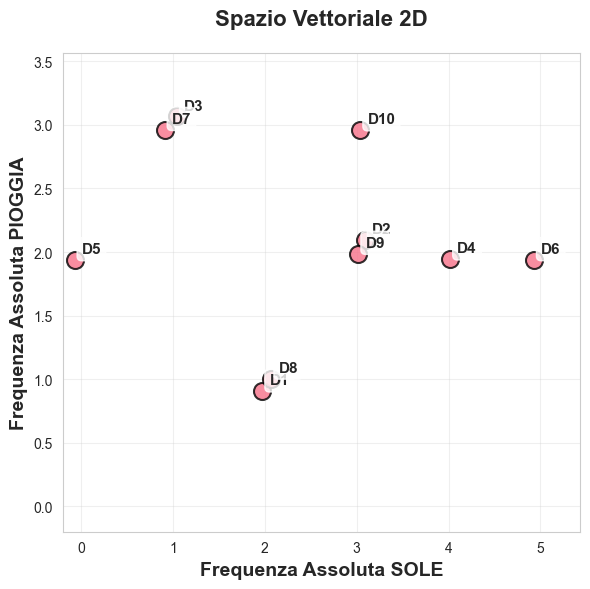

In [25]:
labels = ["D{}".format(i + 1) for i, _ in enumerate(corpus)]
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.scatterplot(
    data=Cj, 
    x='sole', 
    y='pioggia',
    s=150,
    alpha=0.8,
    edgecolor='black',
    linewidth=1.5
)
for idx, row in Cj.iterrows():
    ax.annotate(
        labels[idx],
        (row['sole'], row['pioggia']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=11,
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8)
    )
plt.xlabel('Frequenza Assoluta SOLE', fontsize=14, fontweight='bold')
plt.ylabel('Frequenza Assoluta PIOGGIA', fontsize=14, fontweight='bold')
plt.title('Spazio Vettoriale 2D', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlim(-0.2, max(Cj['sole']) + 0.5)
plt.ylim(-0.2, max(Cj['pioggia']) + 0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Una prima utilità pratica: misurare distanze
I punti rappresentano i documenti nel senso delle loro proprietà lessicali. Ciò significa che se calcoliamo la distanza fra questi punti possiamo avere una misura della distanza lessicale fra due documenti.

Dal momento che abbiamo punti in uno spazio possiamo usare due metodi principali per calcolarne la distanza:

#### Distanza euclidea
$$d = \sqrt{ \sum\limits_{i=0}^{n}\left (x_i - y_i)^2 \right ) }$$

#### Distanza del coseno
$$ d = \frac{\mathbf{a} \cdot \mathbf{b}}{|\mathbf{a}| * |\mathbf{b}|} $$

in cui:
- $\mathbf{a} \cdot \mathbf{b}$ è il prodotto scalare fra due vettori
- $\sqrt{\sum_{i=1}^{n} a_i^2}$ + la magnitudine di un vettore

### Nota sul prodotto scalare
Il segno del prodotto scalare $\mathbf{a} \cdot \mathbf{b}$ ha un importante significato geometrico:

- Positivo ($\mathbf{a} \cdot \mathbf{b} > 0$): I vettori formano un angolo acuto ($\theta < 90°$), indicando che puntano in direzioni simili
- Zero ($\mathbf{a} \cdot \mathbf{b} = 0$): I vettori sono ortogonali (perpendicolari), formando un angolo retto ($\theta = 90°$)
- Negativo ($\mathbf{a} \cdot \mathbf{b} < 0$): I vettori formano un angolo ottuso ($\theta > 90°$), indicando che puntano in direzioni opposte

Nel nostro contesto meteorologico, un prodotto scalare positivo tra due vettori documento suggerisce pattern climatici simili, mentre un prodotto scalare negativo indica pattern contrastanti (uno prevalentemente soleggiato, l'altro piovoso).

### Usare la distanza per cercare documenti

In [43]:
from mdh.utils import cosine_distance, euclidean_distance

In [44]:
query = np.array([0.0, 1.0])
results = {}
for i, d in enumerate(c):
    results[labels[i]] = cosine_distance(query, d)
R = pd.Series(results)

In [46]:
R.sort_values(ascending=True)

D5     0.000000
D3     0.051317
D7     0.051317
D10    0.292893
D2     0.445300
D9     0.445300
D1     0.552786
D4     0.552786
D8     0.552786
D6     0.628609
dtype: float64

In [52]:
for k, v in R.sort_values(ascending=True).items():
    i = labels.index(k)
    print(f"{np.round(v, 3):<10} => {c[i]} => {corpus[i]}")

0.0        => [0. 2.] => pioggia pioggia
0.051      => [1. 3.] => pioggia pioggia pioggia sole
0.051      => [1. 3.] => sole pioggia pioggia pioggia
0.293      => [3. 3.] => sole sole sole pioggia pioggia pioggia
0.445      => [3. 2.] => sole sole sole pioggia pioggia
0.445      => [3. 2.] => pioggia sole sole sole pioggia
0.553      => [2. 1.] => sole pioggia sole
0.553      => [4. 2.] => sole sole sole sole pioggia pioggia
0.553      => [2. 1.] => sole sole pioggia
0.629      => [5. 2.] => sole sole sole sole sole pioggia pioggia


## Domanda: quali sono i limiti di questo metodo così come emergono dall'esempio?